In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
recent_date = session.query(measurement).order_by(measurement.date.desc()).first()
recent_date.date

'2017-08-23'

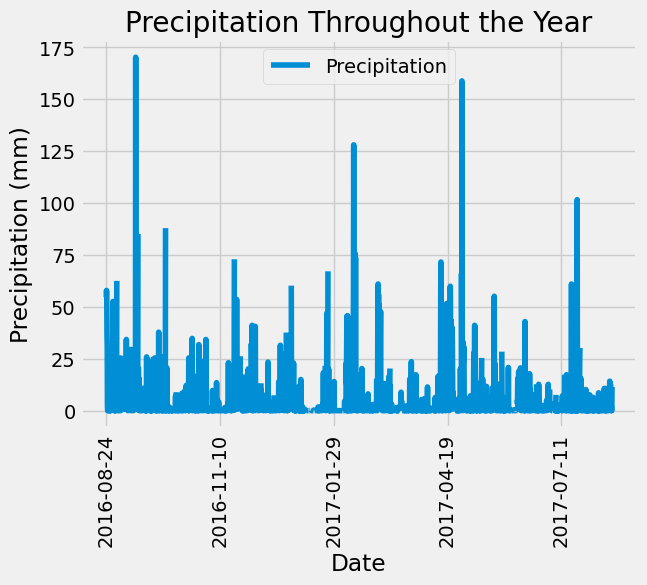

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.datetime.strptime(recent_date.date, '%Y-%m-%d').date()
# Calculate the date one year from the last date in data set.
query_date = last_date - dt.timedelta(days=364)

# Perform a query to retrieve the data and precipitation scores
recent_scores = session.query(measurement.date, measurement.prcp).\
                    filter(func.strftime('%Y-%m-%d', measurement.date) >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(recent_scores, columns=['Date', 'Precipitation'])
scores_df.set_index('Date', inplace=True)

# Sort the dataframe by date
sorted_measurement = scores_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
sorted_measurement.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Throughout the Year')
plt.show()

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_measurement.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and the counts in descending order.
active_station = [measurement.station, func.count(measurement.station)]

stations = session.query(*active_station).group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).first().station

session.query(*active_station).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

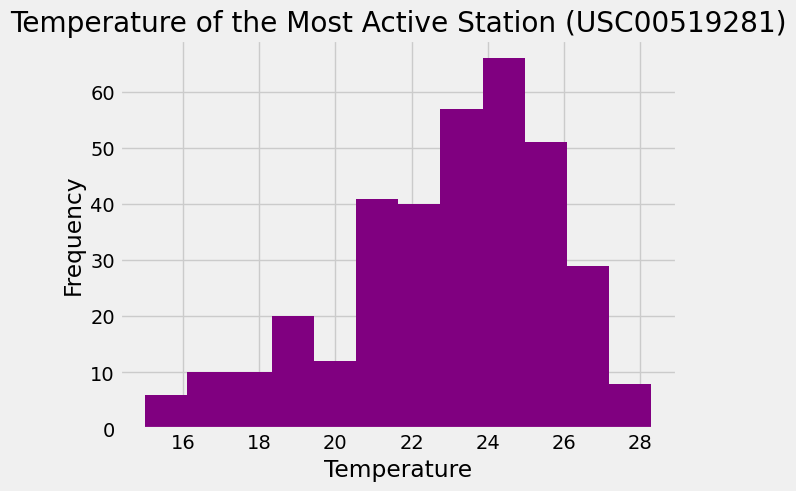

In [63]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = session.query(measurement.station, measurement.tobs).filter(func.strftime('%Y-%m-%d', measurement.date) > query_date).filter(measurement.station == stations).all()
temp_df = pd.DataFrame(station_temp, columns=['Station', 'Temperature'])

# Use Pandas Plotting with Matplotlib to plot the data
temp_df.hist(bins=12, color='purple')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature of the Most Active Station ({station_temp[0][0]})')
plt.show()

# Close Session

In [64]:
# Close Session
session.close()